# "DFT as Change of Basis"
> "Signals and Signal Processing Module"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing, JuliaLang]

# Exploring Fourier Basis

The Discrete Fourier Transform (DFT) is a powerful tool for analyzing signals.
At its core, the DFT is a simple change of basis.

In this notebook, we will explore and generate some of the Fourier Basis. We will also show that these basis are in fact Orthogonal.

In "signal" notation, the Fourier Basis for $C^{N}$ is:

$w_k[n] = e^{j\frac{2\pi}{N}nk}$

> Here the index $k$ will denote the vector in the family of vectors in $C^{N}$

> The index $n$ will denote the element of the vector $w_k$

> where $n$, $k$ = 0, ..., $N-1$.

In [6]:
using MySignalProcessing
using Plots
using LinearAlgebra

## First Vector of Basis,  $k = 0$

Let us generate this first vector. If we plug in $k = 0$ into the formula for the Fourier Basis, we get:

In [3]:
k = 0;

w₀ = [exp(((2pi/64)*im)*n*k) for n in 1:64-1] # generate 64-element vector with k=0
n = [x for x in range(0, 64 - 1)];

Now plot both Real and Imaginary parts of the vector:

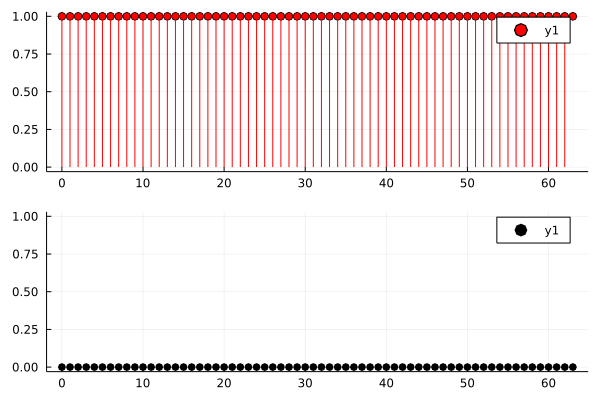

In [7]:
gr()

p1 = plot(n , real(w₀), line = :stem, marker = :o, color=:red)
p2 = plot(n , imag(w₀), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = (2,1))

Real part of $w_0[n]$ is all one and Imaginary part is all zero.

## Second Vector of Basis, $k = 1$

Here we do the same thing, and plug in $k = 1$ in the formula to construct the second vector:

In [8]:
k = 1;

w₁ = [exp(((2pi/64)*im)*n*k) for n in range(0, 64-1)];
n = [x for x in range(0, 64 - 1)];

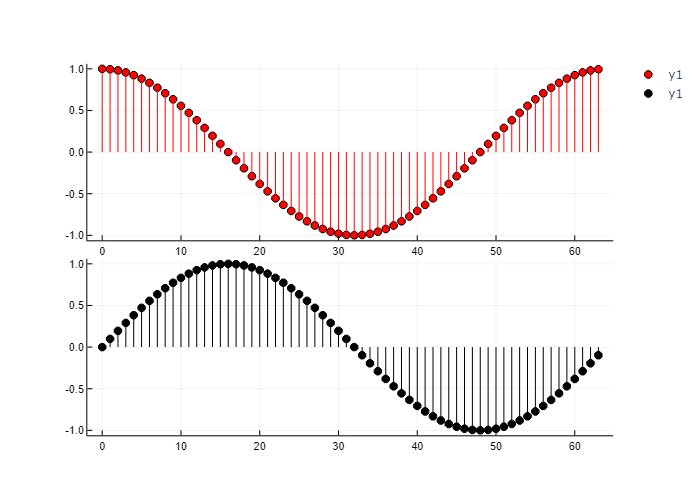

In [9]:
plotlyjs()

l = layout = (2,1)

p1 = plot(n , real(w₁), line = :stem, marker = :o, color=:red)
p2 = plot(n , imag(w₁), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = l)

in this basis , we have a full period on both real and imaginary parts.
As we go up in the basis index, the speed increases.

## Third Vector of Basis, $k = 2$

In [10]:
k = 2;
w₃ = [exp(((2pi/64)*im)*n*k) for n in range(0, 64-1)];
n = [x for x in range(0, 64 - 1)];


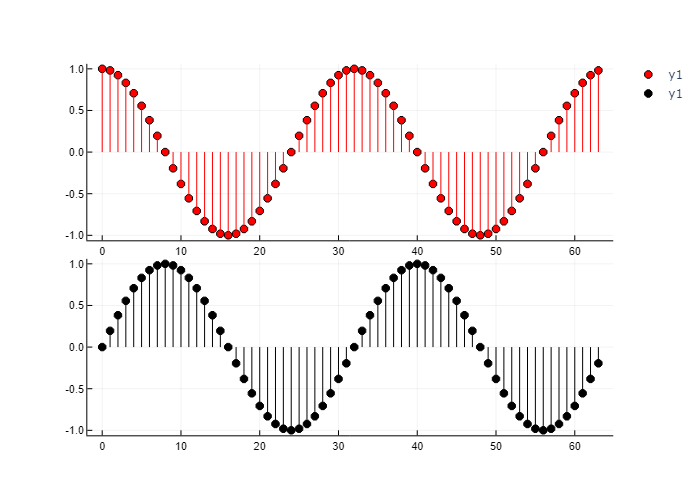

In [11]:
l = layout = (2,1)

p1 = plot(n , real(w₃), line = :stem, marker = :o, color=:red)
p2 = plot(n , imag(w₃), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = l)

## 4th Vector of Basis, $k = 3$

In [12]:
k = 3;
w₄ = [exp(((2pi/64)*im)*n*k) for n in range(0, 64-1)];
n = [x for x in range(0, 64 - 1)];

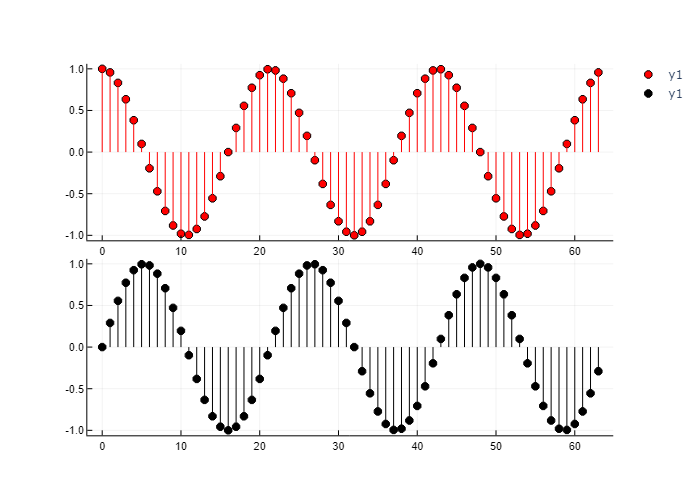

In [13]:
l = layout = (2,1)

p1 = plot(n , real(w₄), line = :stem, marker = :o, color=:red)
p2 = plot(n , imag(w₄), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = l)

I believe you are getting the idea: as we go up in the basis index, the vector will move faster and faster.
Some of these basis are pretty interesting:

## vector k = 16 of the basis

In [14]:
k = 16;
w16  = [exp(((2pi/64)*im)*n*k) for n in range(0, 64-1)];
n = [x for x in range(0, 64 - 1)];

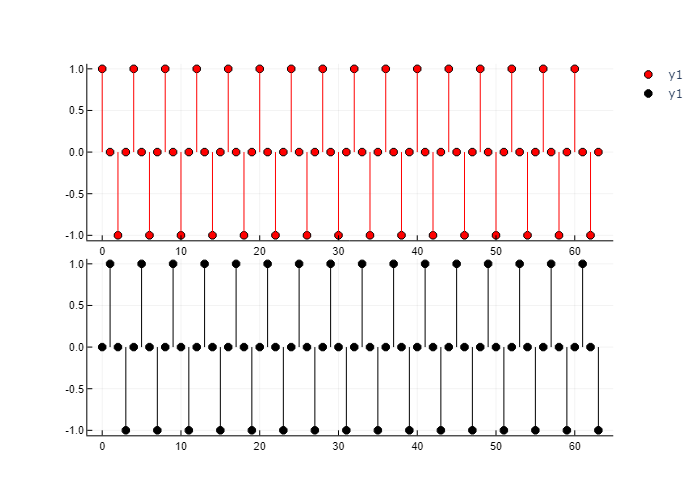

In [15]:
l = layout = (2,1)

p1 = plot(n , real(w16), line = :stem, marker = :o, color=:red)
p2 = plot(n , imag(w16), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = l)

This vector is going  so fast that we have only positive unit and then it we see the negative unit.

## highest frequency signal can have is reached when k = 32

In [16]:
k = 32;;
w32 = [exp(((2pi/64)*im)*n*k) for n in range(0, 64-1)];
n = [x for x in range(0, 64 - 1)];

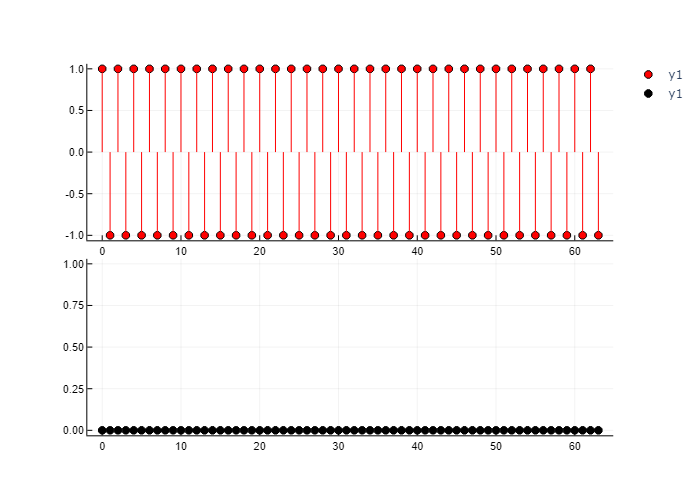

In [17]:
l = layout = (2,1)

p1 = plot(n , real(w32), line = :stem, marker = :o, color=:red)
p2 = plot(n , round.(imag(w32)), line = :stem, marker = :o, color=:black)

plot(p1, p2, layout = l)

After this, the vectors are actually going to appear slower than the previous ones, going backwards. 

I will leave you to try out some of the remaining ones.

Now, I claim that all these Vectors in the family of vectors $w_k$ in $C^{N}$ are Orthogonal.

Lets try to prove this. 

When two vectors are orthogonal, their dot product (inner) is zero.

So we if we take all the vectors in the basis and compute their dot product with each other, we should get zero.

## Orthogonality of the Basis Vectors

I am going to take Dot products of the basis vectors we have seen above. 


Let's define some symbolics to study all the different combinations we have:


In [19]:
using Symbolics

@variables w₀ w₁ w₃ w₄ w16 w32 #defining the symbolics vectors w₀, w₁, w₃, w₄, w16, w32

6-element Vector{Num}:
  w₀
  w₁
  w₃
  w₄
 w16
 w32

We can create a Set with the basis vectors:

In [20]:
V₁ = Set([w₀, w₁, w₃, w₄, w16, w32])

Set{Num} with 6 elements:
  w₁
  w₄
  w32
  w₀
  w16
  w₃

Now we can take the outer product of this set with itself to get all the different combination and groupings to compare:

In [21]:
M = Iterators.product(V₁, V₁) |> collect


6×6 Matrix{Tuple{Num, Num}}:
 (w₁, w₁)   (w₁, w₄)   (w₁, w32)   (w₁, w₀)   (w₁, w16)   (w₁, w₃)
 (w₄, w₁)   (w₄, w₄)   (w₄, w32)   (w₄, w₀)   (w₄, w16)   (w₄, w₃)
 (w32, w₁)  (w32, w₄)  (w32, w32)  (w32, w₀)  (w32, w16)  (w32, w₃)
 (w₀, w₁)   (w₀, w₄)   (w₀, w32)   (w₀, w₀)   (w₀, w16)   (w₀, w₃)
 (w16, w₁)  (w16, w₄)  (w16, w32)  (w16, w₀)  (w16, w16)  (w16, w₃)
 (w₃, w₁)   (w₃, w₄)   (w₃, w32)   (w₃, w₀)   (w₃, w16)   (w₃, w₃)

Some of these groupings for the Dot product have a vectors grouped with itself.

A dot prodcut of a vector with itself is going to give the magnitude of the vector. 

We are not really interested in this, but we can keep that in our minds as we check the result of all these grouping.

In [22]:
w₀ = [exp(((2pi/64)*im)*n*0) for n in range(0, 64-1)];
w₁ = [exp(((2pi/64)*im)*n*1) for n in range(0, 64-1)];
w₃ = [exp(((2pi/64)*im)*n*3) for n in range(0, 64-1)];
w₄ = [exp(((2pi/64)*im)*n*4) for n in range(0, 64-1)];
w16 = [exp(((2pi/64)*im)*n*16) for n in range(0, 64-1)];
w32 = [exp(((2pi/64)*im)*n*32) for n in range(0, 64-1)];

In [23]:
V₁ = Set([w₀, w₁, w₃, w₄, w16, w32])

Set{Vector{ComplexF64}} with 6 elements:
  ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 1…
  ComplexF64[1.0 + 0.0im, 0.9569403357322088 + 0.29028467725446233im, 0.8314696…
  ComplexF64[1.0 + 0.0im, 6.123233995736766e-17 + 1.0im, -1.0 + 1.2246467991473…
  ComplexF64[1.0 + 0.0im, 0.9238795325112867 + 0.3826834323650898im, 0.70710678…
  ComplexF64[1.0 + 0.0im, 0.9951847266721969 + 0.0980171403295606im, 0.98078528…
  ComplexF64[1.0 + 0.0im, -1.0 + 1.2246467991473532e-16im, 1.0 - 2.449293598294…

In [24]:
M = Iterators.product(V₁, V₁) |> collect

6×6 Matrix{Tuple{Vector{ComplexF64}, Vector{ComplexF64}}}:
 ([1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im  …  1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im], [1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im  …  1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im])                                                                                                                                                                                              …  ([1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im  …  1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im, 1.0+0.0im], [1.0+0.0im, -1.0+1.22465e-16im, 1.0-2.44929e-16im, -1.0+3.67394e-16im, 

Now we can iterate over the collection M and take the Dot product of each grouping:

In [26]:

r = [round(M[i][1] ⋅ M[i][2] , digits = 2) for i in range(1, length(M))]

36-element Vector{ComplexF64}:
 64.0 + 0.0im
 -0.0 + 0.0im
 -0.0 + 0.0im
 -0.0 - 0.0im
 -0.0 - 0.0im
  0.0 + 0.0im
 -0.0 - 0.0im
 64.0 + 0.0im
  0.0 + 0.0im
 -0.0 + 0.0im
      ⋮
 -0.0 + 0.0im
 64.0 + 0.0im
 -0.0 + 0.0im
  0.0 - 0.0im
 -0.0 - 0.0im
 -0.0 - 0.0im
  0.0 - 0.0im
 -0.0 - 0.0im
 64.0 + 0.0im

The dot product of a basis vector with itself converges to 64 since the elements in the sum will be equal to 1.
All the other vectors  have a dot product of 0, therefore they form a basis of orthogonal vectors in $C^N$.

Julia language is a powerful tool for these kinds of analysis. 

It makes it easier to play as notation is so close to the mathematical notation and theory.